In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# Time setup
total_years = 10
dt = 1  # yearly time step
n = int(total_years / dt)
time = np.linspace(0, total_years, n)

# Initial stocks
initial_below_baseline = 800
initial_baseline = 100
initial_efficient = 100
initial_adopters = initial_efficient #needed for Bass Diffusion (Does this mean that we are already part way on the curve?)

total_stock = initial_below_baseline + initial_baseline + initial_efficient
""" Could do this from inividual pieces to total market size or market size to individual pieces"""
m = 1000  # market size for the equipment # not used in Par

# Initialize arrays

Below_Baseline_Stock = np.zeros(n)
Baseline_Stock = np.zeros(n)
Efficient_Stock = np.zeros(n)
Cumulative_adopters = np.zeros(n)


Retirement_Flow_arr = np.zeros(n)
Below_Baseline_Adoption_Flow_arr = np.zeros(n)
Baseline_Adoption_Flow_arr = np.zeros(n)
Efficient_Adoption_Flow_arr = np.zeros(n)

# Set initial values

Below_Baseline_Stock[0] = initial_below_baseline
Baseline_Stock[0] = initial_baseline
Efficient_Stock[0] = initial_efficient
Cumulative_adopters[0] = initial_adopters



In [40]:
# Bass diffusion and retirement parameters
par = {
    "p": 0.03,                 # innovation coefficient
    "q": 0.38,                 # imitation coefficient
    "market_size": 1000,       # total market size
    "retirement_rate": 0.05    # 5% of total equipment retires per year
}


In [ ]:
def bass_diff_eq(Below_Baseline, Baseline, Efficient, Cumulative_Upgraded, par):
    # Parameters
    p = par["p"]               # innovation coefficient
    q = par["q"]               # imitation coefficient
    m = par["market_size"]     # total market size
    retirement_rate = par["retirement_rate"]  # fraction of existing equipment retired per time step

    # Retirement flow
    Retirement_Flow = m * retirement_rate

    # Bass diffusion flow (upgrade adoption)
    #S_upgraded = (p + q * (Cumulative_Upgraded / Retirement_Flow)) * (Retirement_Flow - Cumulative_Upgraded)
    S_new_adopters = (p + q * (Cumulative_adopters / m)) * (m - Cumulative_adopters)
    
    Efficient_Adoption_Flow = min(S_new_adopters, Retirement_Flow) #either the bass diff number or all available retiring units 

    # Baseline adoption is the remainder of retirement #because it is assumed that all retiring units are replaced by some unit and would never go below baseline
    Baseline_Adoption_Flow = Retirement_Flow - Efficient_Adoption_Flow

    Below_Baseline_Adoption_Flow = 0  # Assuming no increase in below baseline stock
    
    # Differential changes (Euler step)
    dBelow_Baseline_dt = -Baseline_Adoption_Flow - Efficient_Adoption_Flow #we assume that there is never an increase in below baseline stock 
    dBaseline_dt = Baseline_Adoption_Flow
    dEfficient_dt = Efficient_Adoption_Flow
    dadopters_dt = Efficient_Adoption_Flow

    # Flows dictionary
    flows = {
        "Retirement": Retirement_Flow,
        "Efficient_Adoption": Efficient_Adoption_Flow,
        "Baseline_Adoption": Baseline_Adoption_Flow,
        "Below_Baseline_Adoption": Below_Baseline_Adoption_Flow
    }

    return dBelow_Baseline_dt, dBaseline_dt, dEfficient_dt, dadopters_dt, flows


In [ ]:
for t in range(1, n):
    dBelow_Baseline_dt, dBaseline_dt, dEfficient_dt, dadopters_dt, flows = bass_diff_eq(
        Below_Baseline_Stock[t-1],
        Baseline_Stock[t-1],
        Efficient_Stock[t-1],
        Cumulative_adopters[t-1],
        par
    )

    # Euler integration
    Below_Baseline_Stock[t] = Below_Baseline_Stock[t-1] + dBelow_Baseline_dt * dt
    Baseline_Stock[t] = Baseline_Stock[t-1] + dBaseline_dt * dt
    Efficient_Stock[t] = Efficient_Stock[t-1] + dEfficient_dt * dt
    Cumulative_adopters[t] = Cumulative_adopters[t-1] + dadopters_dt * dt

    # Log flows
    Retirement_Flow_arr[t] = flows["Retirement"]
    Efficient_Adoption_Flow_arr[t] = flows["Efficient_Adoption"]
    Baseline_Adoption_Flow_arr[t] = flows["Baseline_Adoption"]
    Below_Baseline_Adoption_Flow_arr[t] = flows["Below_Baseline_Adoption"]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

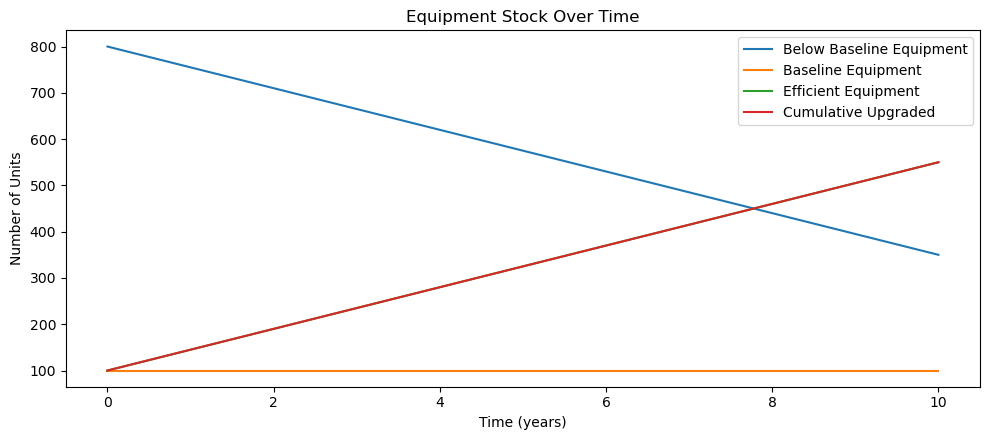

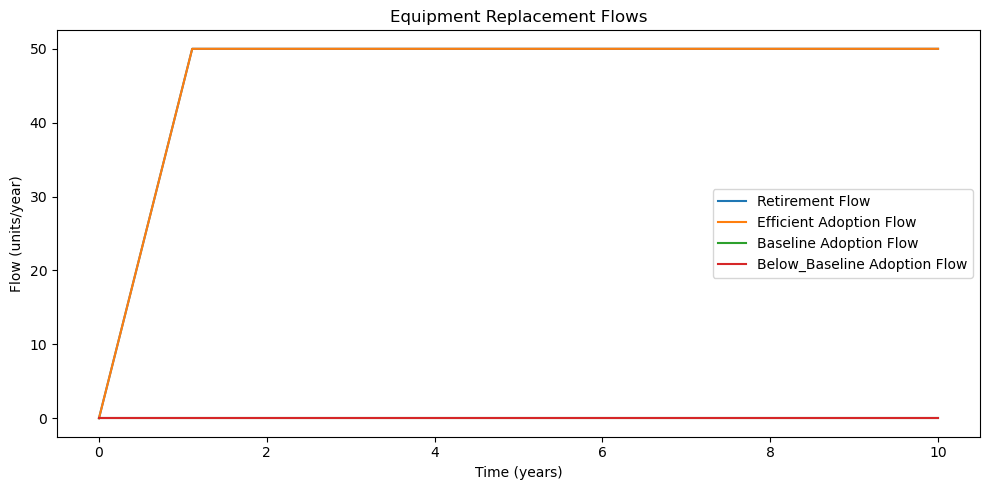

In [ ]:
# Equipment Stocks
plt.figure(figsize=(10, 4.5))
plt.plot(time, Below_Baseline_Stock, label="Below Baseline Equipment")
plt.plot(time, Baseline_Stock, label="Baseline Equipment")
plt.plot(time, Efficient_Stock, label="Efficient Equipment")
plt.plot(time, Cumulative_Upgraded, label="Cumulative Upgraded")
plt.xlabel("Time (years)")
plt.ylabel("Number of Units")
plt.title("Equipment Stock Over Time")
plt.legend()
plt.tight_layout()
plt.show()

# Equipment Flows
plt.figure(figsize=(10, 5))
plt.plot(time, Retirement_Flow_arr, label="Retirement Flow")
plt.plot(time, Efficient_Adoption_Flow_arr, label="Efficient Adoption Flow")
plt.plot(time, Baseline_Adoption_Flow_arr, label="Baseline Adoption Flow")
plt.plot(time, Below_Baseline_Adoption_Flow_arr, label="Below_Baseline Adoption Flow")
plt.xlabel("Time (years)")
plt.ylabel("Flow (units/year)")
plt.title("Equipment Replacement Flows")
plt.legend()
plt.tight_layout()
plt.show()
